# Part 1: Data Ingestion, Data Collection

In [3]:
# Run this only when you face cache issues
# import shutil, os, glob, pathlib

# candidates = [
#     os.path.expanduser("~/Library/Caches/wbdata"),           # common
#     os.path.expanduser("~/Library/Caches/wbdata/wbdata"),     # some installs
#     os.path.expanduser("~/.cache/wbdata"),                    # XDG-style
# ]

# for p in candidates:
#     if os.path.exists(p):
#         print("Removing cache:", p)
#         shutil.rmtree(p, ignore_errors=True)

# (Optional) if you had set WBDATA_CACHE_PATH before, clear that dir too:
# shutil.rmtree("/tmp/wbdata_cache", ignore_errors=True)


In [4]:
!pip install wbdata

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wbdata

In [6]:
indicators_test = wbdata.get_indicators()

# Filter for GDP-related indicators
gdp_indicators = [i for i in indicators_test if "gdp" in i['name'].lower()]

# check for US GDP
for ind in gdp_indicators[:]:
    if ind["id"] == "NY.GDP.MKTP.CD":
        print(ind['id'], ":", ind['name'])

NY.GDP.MKTP.CD : GDP (current US$)


In [7]:
# Fetching all the required indicators for our project
indicators = {'Indicator Name': [
        'Gross Domestic Product (GDP)',
        'Gross National Income (GNI)',
        'Inflation rate',
        'Unemployment rate',
        'Poverty rate',
        'Life expectancy',
        'Literacy rate',
        'Access to electricity',
        'Mobile phone subscriptions',
        'Government expenditure on education',
        'Foreign direct investment (FDI)',
        'Exports of goods and services',
        'Imports of goods and services',
        'Gross capital formation',
        'Agricultural land area',
        'Agricultural production index'
    ],
    'Indicator ID': [
        'NY.GDP.MKTP.CD',
        'NY.GNP.MKTP.CD',
        'FP.CPI.TOTL.ZG',
        'SL.UEM.TOTL.ZS',
        'SI.POV.NAHC',
        'SP.DYN.LE00.IN',
        'SE.ADT.LITR.ZS',
        'EG.ELC.ACCS.ZS',
        'IT.CEL.SETS.P2',
        'SE.XPD.TOTL.GB.ZS',
        'BX.KLT.DINV.WD.GD.ZS',
        'NE.EXP.GNFS.ZS',
        'NE.IMP.GNFS.ZS',
        'NE.GDI.TOTL.ZS',
        'AG.LND.AGRI.ZS',
        'AG.PRD.FOOD.XD'
    ]
             }

In [8]:
indicators

{'Indicator Name': ['Gross Domestic Product (GDP)',
  'Gross National Income (GNI)',
  'Inflation rate',
  'Unemployment rate',
  'Poverty rate',
  'Life expectancy',
  'Literacy rate',
  'Access to electricity',
  'Mobile phone subscriptions',
  'Government expenditure on education',
  'Foreign direct investment (FDI)',
  'Exports of goods and services',
  'Imports of goods and services',
  'Gross capital formation',
  'Agricultural land area',
  'Agricultural production index'],
 'Indicator ID': ['NY.GDP.MKTP.CD',
  'NY.GNP.MKTP.CD',
  'FP.CPI.TOTL.ZG',
  'SL.UEM.TOTL.ZS',
  'SI.POV.NAHC',
  'SP.DYN.LE00.IN',
  'SE.ADT.LITR.ZS',
  'EG.ELC.ACCS.ZS',
  'IT.CEL.SETS.P2',
  'SE.XPD.TOTL.GB.ZS',
  'BX.KLT.DINV.WD.GD.ZS',
  'NE.EXP.GNFS.ZS',
  'NE.IMP.GNFS.ZS',
  'NE.GDI.TOTL.ZS',
  'AG.LND.AGRI.ZS',
  'AG.PRD.FOOD.XD']}

In [9]:
indicators = pd.DataFrame(indicators)

In [10]:
indicators

,Indicator Name,Indicator ID
0,Gross Domestic Product (GDP),NY.GDP.MKTP.CD
1,Gross National Income (GNI),NY.GNP.MKTP.CD
2,Inflation rate,FP.CPI.TOTL.ZG
3,Unemployment rate,SL.UEM.TOTL.ZS
4,Poverty rate,SI.POV.NAHC
5,Life expectancy,SP.DYN.LE00.IN
6,Literacy rate,SE.ADT.LITR.ZS
7,Access to electricity,EG.ELC.ACCS.ZS
8,Mobile phone subscriptions,IT.CEL.SETS.P2
9,Government expenditure on education,SE.XPD.TOTL.GB.ZS


In [11]:
from datetime import datetime

In [12]:
start_date = '2015-01-01'
end_date = '2020-12-31'
start_date_obj = datetime.strptime(start_date,"%Y-%m-%d")
end_date_obj = datetime.strptime(end_date,"%Y-%m-%d")

data_date = (start_date_obj, end_date_obj)

In [13]:
data_date

(datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2020, 12, 31, 0, 0))

In [14]:
new_df = pd.DataFrame()

In [15]:
wbdata.get_dataframe({"NY.GDP.MKTP.CD": "GDP (current US$)"}, 
                          country="all", 
                          date=data_date)

GDP (current US$)
country                     date                   
Africa Eastern and Southern 2020       9.334072e+11
                            2019       1.009747e+12
                            2018       1.012291e+12
                            2017       9.730251e+11
                            2016       8.289612e+11
...                                             ...
Zimbabwe                    2019       2.571566e+10
                            2018       3.415606e+10
                            2017       5.107473e+10
                            2016       2.054876e+10
                            2015       1.996306e+10

[1596 rows x 1 columns]

In [16]:
indicator_dict = dict(zip(indicators["Indicator ID"], indicators["Indicator Name"]))
countries = ['ARG','AUS','BRA','CAN','CHN','FRA','DEU','IND','IDN','ITA',
             'JPN','KOR','MEX','RUS','SAU','ZAF','TUR','GBR','USA']
# Fetch all indicators at once
new_df = wbdata.get_dataframe(indicator_dict, country=countries, date=data_date)

new_df.head()

Gross Domestic Product (GDP)  Gross National Income (GNI)  \
country   date                                                              
Argentina 2020                  3.857405e+11                 3.753441e+11   
          2019                  4.477547e+11                 4.301668e+11   
          2018                  5.248199e+11                 5.060940e+11   
          2017                  6.436284e+11                 6.272005e+11   
          2016                  5.575323e+11                 5.452516e+11   

                Inflation rate  Unemployment rate  Poverty rate  \
country   date                                                    
Argentina 2020             NaN             11.461          42.0   
          2019             NaN              9.843          35.5   
          2018             NaN              9.220          32.0   
          2017             NaN              8.347          25.7   
          2016             NaN              8.085          30.3   

                Life expectancy  Literacy rate  Access to electricity  \
country   date                                                          
Argentina 2020           75.878            NaN                  100.0   
          2019           76.847            NaN                  100.0   
          2018           76.770            NaN                  100.0   
          2017           76.543            NaN                  100.0   
          2016           76.105            NaN                   99.9   

                Mobile phone subscriptions  \
country   date                               
Argentina 2020                     121.181   
          2019                     125.303   
          2018                     131.224   
          2017                     139.758   
          2016                     145.147   

                Government expenditure on education  \
country   date                                        
Argentina 2020                             12.42229   
          2019                             12.51446   
          2018                             12.52334   
          2017                             13.26392   
          2016                             13.35554   

                Foreign direct investment (FDI)  \
country   date                                    
Argentina 2020                         1.266169   
          2019                         1.485007   
          2018                         2.232532   
          2017                         1.789365   
          2016                         0.584749   

                Exports of goods and services  Imports of goods and services  \
country   date                                                                 
Argentina 2020                      16.605414                      13.598284   
          2019                      17.924878                      14.705737   
          2018                      14.436686                      16.325850   
          2017                      11.320283                      13.969318   
          2016                      12.527095                      13.566793   

                Gross capital formation  Agricultural land area  \
country   date                                                    
Argentina 2020                14.415156               43.000577   
          2019                14.210030               42.605730   
          2018                16.613885               42.361477   
          2017                18.212567               42.982576   
          2016                17.663228               43.432424   

                Agricultural production index  
country   date                                 
Argentina 2020                         108.57  
          2019                         112.42  
          2018                          97.51  
          2017                         105.91  
          2016                         100.95

In [17]:
new_df.reset_index(inplace=True)

In [18]:
new_df

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.878,NaN,100.0,121.181,12.422290,1.266169,16.605414,13.598284,14.415156,43.000577,108.57
1,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.843,35.5,76.847,NaN,100.0,125.303,12.514460,1.485007,17.924878,14.705737,14.210030,42.605730,112.42
2,Argentina,2018,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.770,NaN,100.0,131.224,12.523340,2.232532,14.436686,16.325850,16.613885,42.361477,97.51
3,Argentina,2017,6.436284e+11,6.272005e+11,NaN,8.347,25.7,76.543,NaN,100.0,139.758,13.263920,1.789365,11.320283,13.969318,18.212567,42.982576,105.91
4,Argentina,2016,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.105,NaN,99.9,145.147,13.355540,0.584749,12.527095,13.566793,17.663228,43.432424,100.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,South Africa,2019,3.893300e+11,3.796119e+11,4.102851,28.468,NaN,66.071,95.000000,85.0,162.739,18.694504,1.314078,27.202129,26.695867,15.820793,79.417850,104.48
110,South Africa,2018,4.052607e+11,3.939427e+11,4.509873,26.906,NaN,65.726,NaN,84.7,157.692,20.293690,1.374291,27.497037,26.988508,16.170583,79.417850,104.36
111,South Africa,2017,3.814488e+11,3.708730e+11,5.186187,27.035,NaN,65.422,87.000000,84.4,153.548,18.880051,0.539674,27.340076,26.195856,16.610734,79.417850,105.85
112,South Africa,2016,3.235855e+11,3.152941e+11,6.602908,26.536,NaN,64.749,91.737244,83.9,143.929,16.120161,0.684613,28.156088,27.705169,16.960452,79.417850,96.06


In [19]:
new_df = new_df.drop(columns=["index"])
new_df

KeyError: "['index'] not found in axis"

In [45]:
new_df

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.878,NaN,100.0,121.181,12.422290,1.266169,16.605414,13.598284,14.415156,43.000577,108.57
1,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.843,35.5,76.847,NaN,100.0,125.303,12.514460,1.485007,17.924878,14.705737,14.210030,42.605730,112.42
2,Argentina,2018,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.770,NaN,100.0,131.224,12.523340,2.232532,14.436686,16.325850,16.613885,42.361477,97.51
3,Argentina,2017,6.436284e+11,6.272005e+11,NaN,8.347,25.7,76.543,NaN,100.0,139.758,13.263920,1.789365,11.320283,13.969318,18.212567,42.982576,105.91
4,Argentina,2016,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.105,NaN,99.9,145.147,13.355540,0.584749,12.527095,13.566793,17.663228,43.432424,100.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,South Africa,2019,3.893300e+11,3.796119e+11,4.102851,28.468,NaN,66.071,95.000000,85.0,162.739,18.694504,1.314078,27.202129,26.695867,15.820793,79.417850,104.48
110,South Africa,2018,4.052607e+11,3.939427e+11,4.509873,26.906,NaN,65.726,NaN,84.7,157.692,20.293690,1.374291,27.497037,26.988508,16.170583,79.417850,104.36
111,South Africa,2017,3.814488e+11,3.708730e+11,5.186187,27.035,NaN,65.422,87.000000,84.4,153.548,18.880051,0.539674,27.340076,26.195856,16.610734,79.417850,105.85
112,South Africa,2016,3.235855e+11,3.152941e+11,6.602908,26.536,NaN,64.749,91.737244,83.9,143.929,16.120161,0.684613,28.156088,27.705169,16.960452,79.417850,96.06


# Part 2: Exploring the Data

In [47]:
new_df.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.878,NaN,100.0,121.181,12.42229,1.266169,16.605414,13.598284,14.415156,43.000577,108.57
1,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.843,35.5,76.847,NaN,100.0,125.303,12.51446,1.485007,17.924878,14.705737,14.210030,42.605730,112.42
2,Argentina,2018,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.770,NaN,100.0,131.224,12.52334,2.232532,14.436686,16.325850,16.613885,42.361477,97.51
3,Argentina,2017,6.436284e+11,6.272005e+11,NaN,8.347,25.7,76.543,NaN,100.0,139.758,13.26392,1.789365,11.320283,13.969318,18.212567,42.982576,105.91
4,Argentina,2016,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.105,NaN,99.9,145.147,13.35554,0.584749,12.527095,13.566793,17.663228,43.432424,100.95


In [48]:
new_df.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              114 non-null    object 
 1   date                                 114 non-null    object 
 2   Gross Domestic Product (GDP)         114 non-null    float64
 3   Gross National Income (GNI)          114 non-null    float64
 4   Inflation rate                       108 non-null    float64
 5   Unemployment rate                    114 non-null    float64
 6   Poverty rate                         42 non-null     float64
 7   Life expectancy                      114 non-null    float64
 8   Literacy rate                        26 non-null     float64
 9   Access to electricity                114 non-null    float64
 10  Mobile phone subscriptions           114 non-null    float64
 11  Government expenditure on education 

In [49]:
new_df["date"] = pd.to_datetime(new_df["date"])

In [50]:
new_df.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020-01-01,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.878,NaN,100.0,121.181,12.42229,1.266169,16.605414,13.598284,14.415156,43.000577,108.57
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,NaN,9.843,35.5,76.847,NaN,100.0,125.303,12.51446,1.485007,17.924878,14.705737,14.210030,42.605730,112.42
2,Argentina,2018-01-01,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.770,NaN,100.0,131.224,12.52334,2.232532,14.436686,16.325850,16.613885,42.361477,97.51
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,NaN,8.347,25.7,76.543,NaN,100.0,139.758,13.26392,1.789365,11.320283,13.969318,18.212567,42.982576,105.91
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.105,NaN,99.9,145.147,13.35554,0.584749,12.527095,13.566793,17.663228,43.432424,100.95


## Descriptive Sumamry

In [52]:
new_df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,114,2017-07-02 04:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-07-02 12:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,NaN
Gross Domestic Product (GDP),114.0,3389858439909.334473,323585509674.481018,1072349506387.034912,1675221888084.814941,2766880619456.232422,21539982000000.0,4838676599525.198242
Gross National Income (GNI),114.0,3404511577697.400391,315294109648.645996,1043271232884.372437,1662172281864.925049,2807299303420.415039,21821877000000.0,4887848477786.668945
Inflation rate,108.0,2.934343,-2.093349,1.003685,1.948958,3.66947,16.332464,3.238843
Unemployment rate,114.0,7.558044,2.351,4.30325,5.6175,9.206,29.217,5.476739
Poverty rate,42.0,17.228571,0.0,10.975,14.35,20.25,43.9,11.323993
Life expectancy,114.0,77.502483,64.053,74.44975,78.166,82.172622,84.56,5.260768
Literacy rate,26.0,94.905279,87.0,94.0,95.0,96.0,99.0,2.448284
Access to electricity,114.0,98.664912,83.9,99.7,100.0,100.0,100.0,3.634666
Mobile phone subscriptions,114.0,119.512828,75.3793,101.6595,119.6385,135.98275,176.134,23.531025


In [53]:
# Convert GDP and GNI to billions because the values are way off then other columns
new_df['GDP_BN'] = new_df['Gross Domestic Product (GDP)']/(10**9)
new_df['GNI_BN'] = new_df['Gross National Income (GNI)']/(10**9)

In [54]:
new_df.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN
0,Argentina,2020-01-01,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.878,NaN,100.0,121.181,12.42229,1.266169,16.605414,13.598284,14.415156,43.000577,108.57,385.740508,375.344057
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,NaN,9.843,35.5,76.847,NaN,100.0,125.303,12.51446,1.485007,17.924878,14.705737,14.210030,42.605730,112.42,447.754684,430.166792
2,Argentina,2018-01-01,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.770,NaN,100.0,131.224,12.52334,2.232532,14.436686,16.325850,16.613885,42.361477,97.51,524.819892,506.094045
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,NaN,8.347,25.7,76.543,NaN,100.0,139.758,13.26392,1.789365,11.320283,13.969318,18.212567,42.982576,105.91,643.628393,627.200464
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.105,NaN,99.9,145.147,13.35554,0.584749,12.527095,13.566793,17.663228,43.432424,100.95,557.532321,545.251641


In [55]:
selected_cols = new_df.columns[4:]

In [56]:
selected_cols

Index(['Inflation rate', 'Unemployment rate', 'Poverty rate',
       'Life expectancy', 'Literacy rate', 'Access to electricity',
       'Mobile phone subscriptions', 'Government expenditure on education',
       'Foreign direct investment (FDI)', 'Exports of goods and services',
       'Imports of goods and services', 'Gross capital formation',
       'Agricultural land area', 'Agricultural production index', 'GDP_BN',
       'GNI_BN'],
      dtype='object')

In [57]:
new_df[selected_cols].describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Inflation rate,108.0,3.0,3.0,-2.0,1.0,2.0,4.0,16.0
Unemployment rate,114.0,8.0,5.0,2.0,4.0,6.0,9.0,29.0
Poverty rate,42.0,17.0,11.0,0.0,11.0,14.0,20.0,44.0
Life expectancy,114.0,78.0,5.0,64.0,74.0,78.0,82.0,85.0
Literacy rate,26.0,95.0,2.0,87.0,94.0,95.0,96.0,99.0
Access to electricity,114.0,99.0,4.0,84.0,100.0,100.0,100.0,100.0
Mobile phone subscriptions,114.0,120.0,24.0,75.0,102.0,120.0,136.0,176.0
Government expenditure on education,101.0,13.0,4.0,2.0,10.0,12.0,15.0,21.0
Foreign direct investment (FDI),114.0,2.0,2.0,-1.0,1.0,2.0,3.0,12.0
Exports of goods and services,114.0,26.0,9.0,10.0,19.0,27.0,32.0,43.0


## Distribution - Histogram

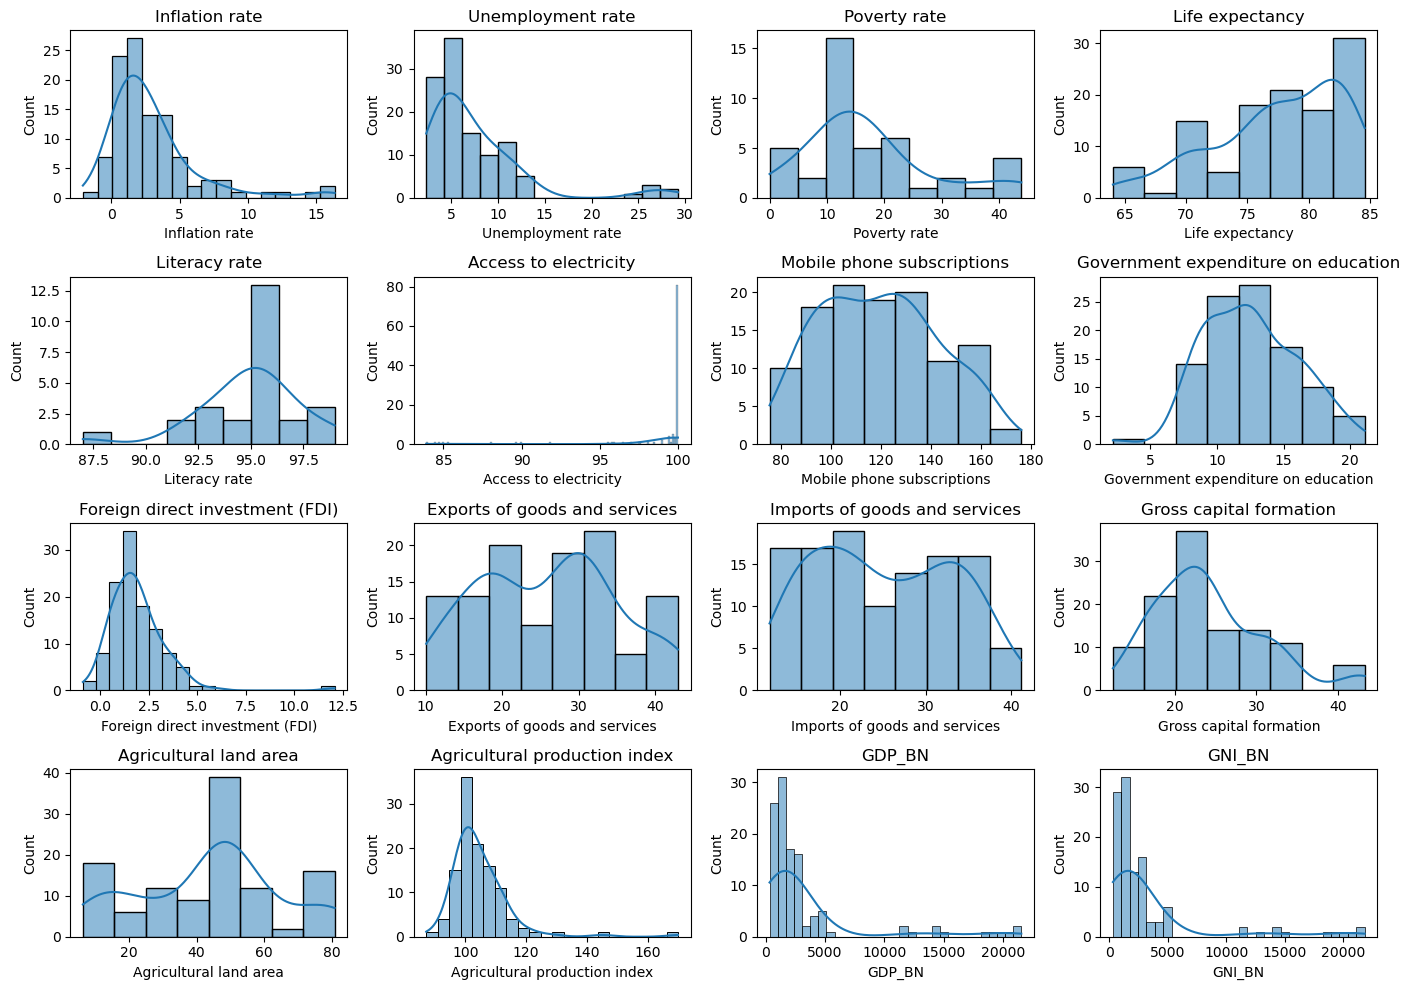

In [59]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.histplot(data=new_df, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [60]:
new_df[selected_cols].skew().sort_values()

Access to electricity                 -3.115712
Literacy rate                         -1.152359
Life expectancy                       -0.737494
Agricultural land area                -0.064954
Exports of goods and services          0.103295
Imports of goods and services          0.114483
Government expenditure on education    0.173544
Mobile phone subscriptions             0.234760
Gross capital formation                0.941442
Poverty rate                           1.009038
Inflation rate                         2.198549
Unemployment rate                      2.477765
GDP_BN                                 2.647889
GNI_BN                                 2.651511
Foreign direct investment (FDI)        2.845374
Agricultural production index          3.401860
dtype: float64

## Outlier Proportion

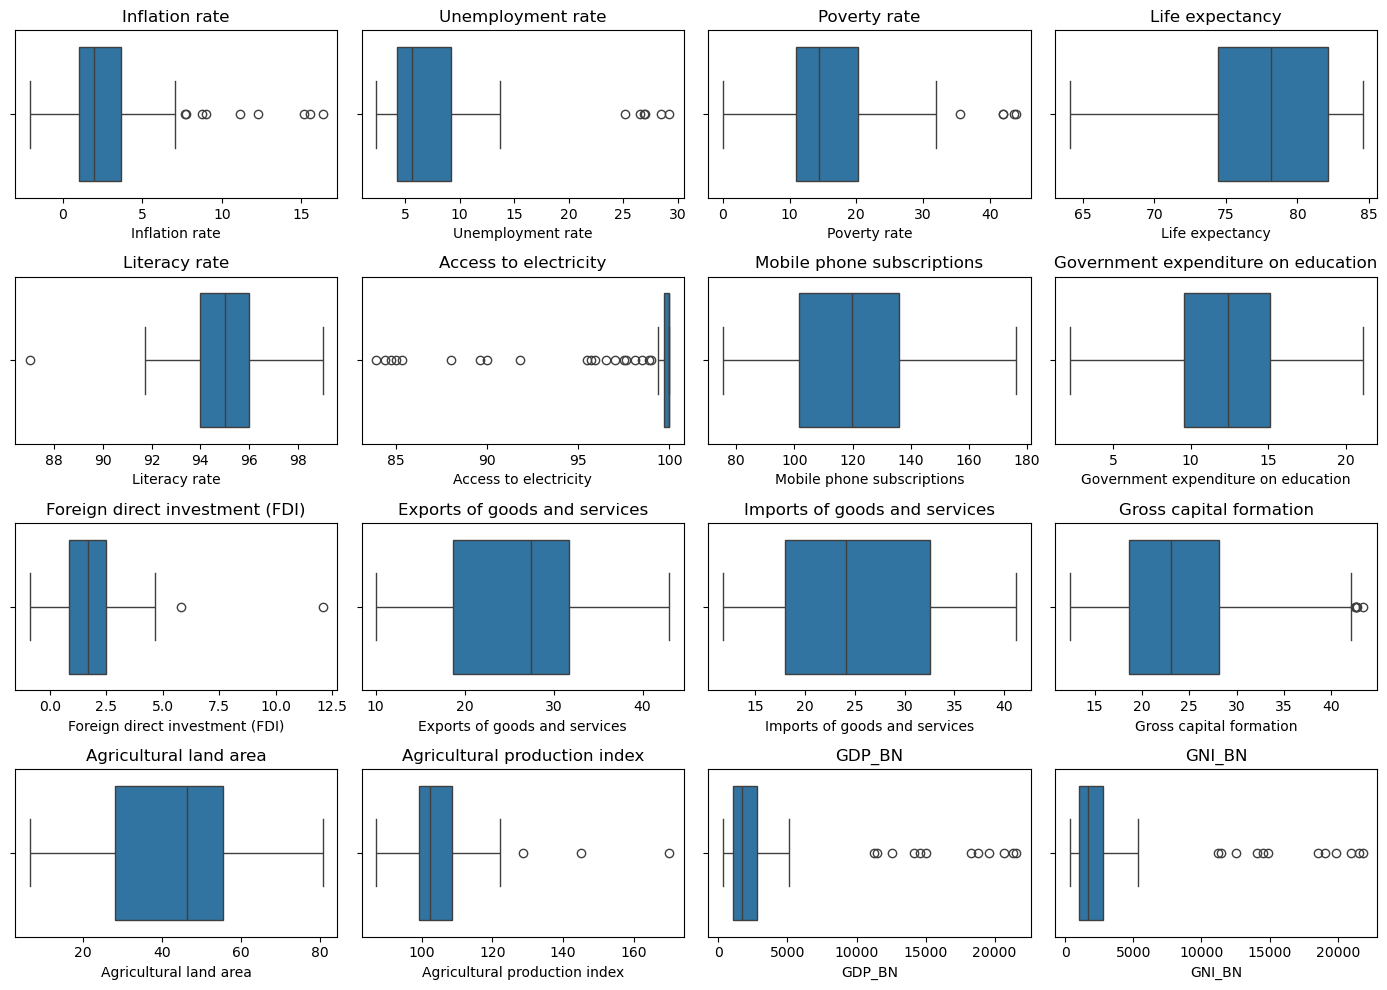

In [62]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.boxplot(data=new_df, x=col, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [63]:
# Fidn proportion of outliers

In [64]:
def outlier(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr = q3 - q1
    return ( x < q1-1.5*iqr) | (x>q3+1.5*iqr)

In [65]:
outlier_percentages = []

for col in selected_cols:
    x = new_df[col]
    outliers = outlier(x)
    outlier_percentage = np.mean(outliers)*100
    outlier_percentages.append(outlier_percentage)
    
    
result_df = pd.DataFrame({'Column': selected_cols, 'Outlier Percentage': outlier_percentages})
result_df = result_df.sort_values('Outlier Percentage', ascending=False)

In [66]:
result_df.round()

,Column,Outlier Percentage
5,Access to electricity,18.0
14,GDP_BN,11.0
15,GNI_BN,11.0
0,Inflation rate,8.0
1,Unemployment rate,5.0
2,Poverty rate,4.0
11,Gross capital formation,4.0
13,Agricultural production index,3.0
8,Foreign direct investment (FDI),2.0
4,Literacy rate,1.0


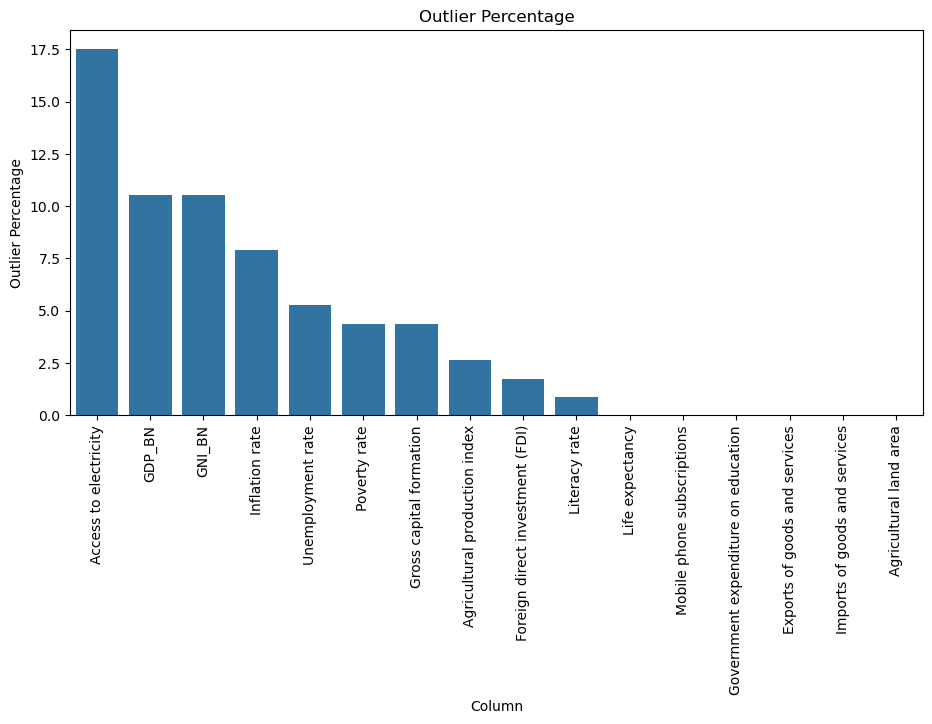

In [67]:
plt.figure(figsize=(11,5))
sns.barplot(x=result_df['Column'], y=result_df['Outlier Percentage'])
plt.title("Outlier Percentage")
plt.xticks(rotation=90)
plt.show()

## Find Null Values

In [69]:
new_df.isnull().sum()

country                                 0
date                                    0
Gross Domestic Product (GDP)            0
Gross National Income (GNI)             0
Inflation rate                          6
Unemployment rate                       0
Poverty rate                           72
Life expectancy                         0
Literacy rate                          88
Access to electricity                   0
Mobile phone subscriptions              0
Government expenditure on education    13
Foreign direct investment (FDI)         0
Exports of goods and services           0
Imports of goods and services           0
Gross capital formation                 0
Agricultural land area                  0
Agricultural production index           0
GDP_BN                                  0
GNI_BN                                  0
dtype: int64

## Check Correaltion 

In [71]:
new_df.corr(numeric_only=True).corr()

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN
Gross Domestic Product (GDP),1.000000,0.999989,-0.415178,-0.482330,-0.828200,0.243301,0.343084,0.296363,-0.344199,-0.106302,-0.119182,-0.708101,-0.707721,0.551463,-0.199288,-0.361484,1.000000,0.999989
Gross National Income (GNI),0.999989,1.000000,-0.417851,-0.483665,-0.827582,0.246505,0.344849,0.298551,-0.342863,-0.109572,-0.120431,-0.706362,-0.706391,0.550258,-0.201276,-0.362944,0.999989,1.000000
Inflation rate,-0.415178,-0.417851,1.000000,0.591265,0.176464,-0.713933,-0.452326,-0.578658,0.076768,0.407034,-0.012370,-0.040574,-0.009892,-0.117148,0.291482,0.402728,-0.415178,-0.417851
Unemployment rate,-0.482330,-0.483665,0.591265,1.000000,0.451194,-0.811310,-0.852239,-0.912727,0.432817,0.639674,-0.072268,0.008751,0.044432,-0.607639,0.726370,0.269668,-0.482330,-0.483665
Poverty rate,-0.828200,-0.827582,0.176464,0.451194,1.000000,-0.113145,-0.469903,-0.170385,0.135412,0.158211,0.289289,0.580464,0.628572,-0.830371,0.235743,0.197205,-0.828200,-0.827582
Life expectancy,0.243301,0.246505,-0.713933,-0.811310,-0.113145,1.000000,0.773125,0.918179,-0.287570,-0.854163,0.058874,0.265401,0.221496,0.196984,-0.687557,-0.408148,0.243301,0.246505
Literacy rate,0.343084,0.344849,-0.452326,-0.852239,-0.469903,0.773125,1.000000,0.789371,-0.356711,-0.715497,-0.246617,0.159006,0.097724,0.684247,-0.636774,-0.011115,0.343084,0.344849
Access to electricity,0.296363,0.298551,-0.578658,-0.912727,-0.170385,0.918179,0.789371,1.000000,-0.378360,-0.785256,0.110358,0.090585,0.049585,0.304103,-0.784940,-0.243906,0.296363,0.298551
Mobile phone subscriptions,-0.344199,-0.342863,0.076768,0.432817,0.135412,-0.287570,-0.356711,-0.378360,1.000000,-0.033441,-0.387455,0.100422,-0.024601,-0.345467,0.171834,0.091703,-0.344199,-0.342863
Government expenditure on education,-0.106302,-0.109572,0.407034,0.639674,0.158211,-0.854163,-0.715497,-0.785256,-0.033441,1.000000,0.142818,-0.304804,-0.200594,-0.164718,0.718324,0.320684,-0.106302,-0.109572


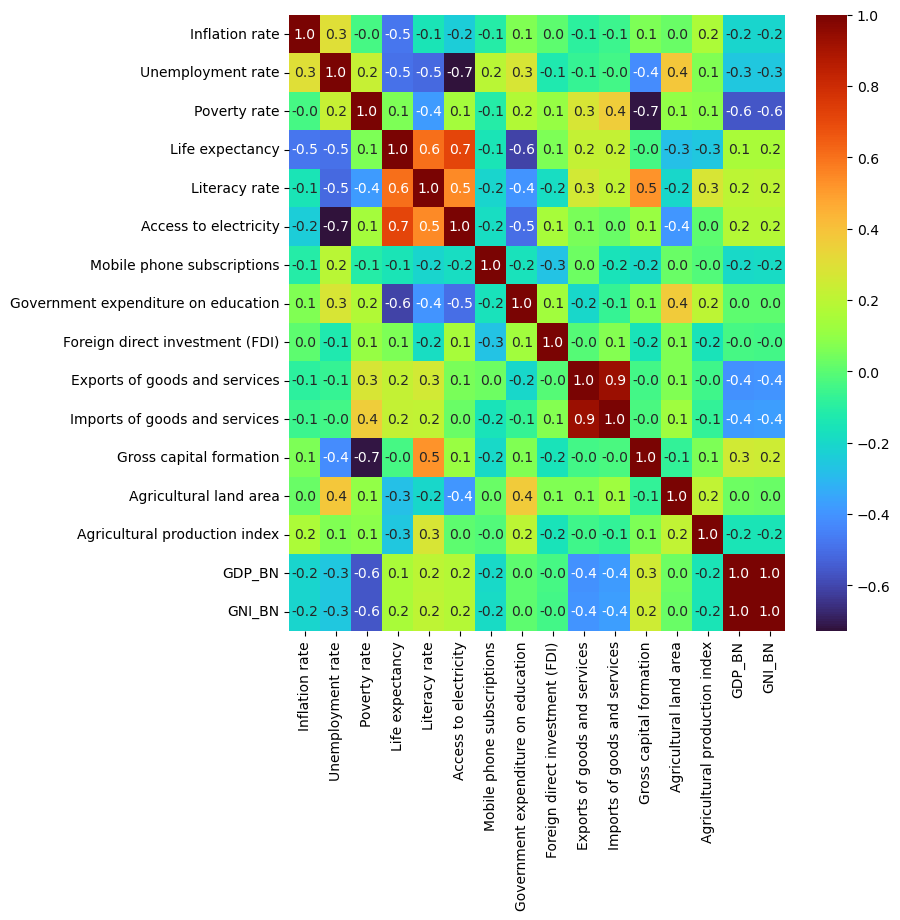

In [72]:
plt.figure(figsize=(8,8))
sns.heatmap(new_df[selected_cols].corr(), annot=True, fmt='.1f', cmap='turbo')
plt.show()

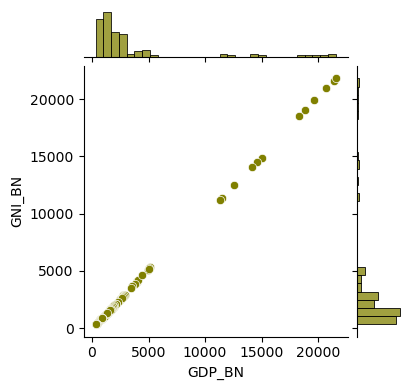

In [96]:
#Study high corelation fields
sns.jointplot(x='GDP_BN', y='GNI_BN', data=new_df, height=4, color='olive')
plt.show()

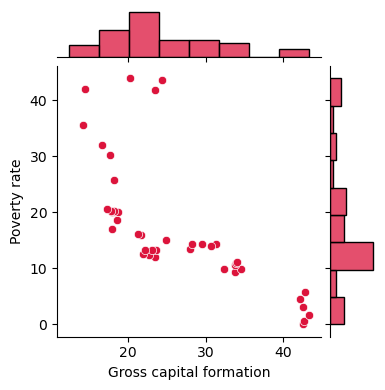

In [98]:
sns.jointplot(x='Gross capital formation', y='Poverty rate', data=new_df, height=4, color='crimson')
plt.show()

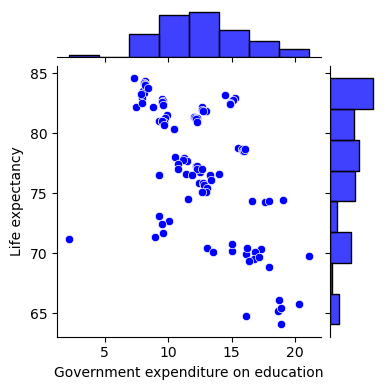

In [100]:
sns.jointplot(x='Government expenditure on education', y='Life expectancy', data=new_df, height=4, color='blue')
plt.show()

## Find out top 3 Countries in all indicators

In [113]:
def top_3(data, parameter):
    year_list = data['date'].dt.year.sort_values().unique()
    result_df = pd.DataFrame(columns=year_list,index=[1,2,3])
    
    for year in year_list:
        df_year = data[data['date'].dt.year == year]
        value = df_year.groupby('country')[parameter].sum().sort_values(ascending=False).head(3).index
        result_df[year] = value
    
    return result_df

In [133]:
# to display each iteration of indicator in data frame like format
from IPython.display import display

In [139]:
for i in selected_cols:
    result = top_3(new_df,i)
    print(i)
    display(result)
    print('-------------------------------------------------')

Inflation rate


,2015,2016,2017,2018,2019,2020
1,Russian Federation,Brazil,Turkiye,Turkiye,Turkiye,Turkiye
2,Brazil,Turkiye,Mexico,Mexico,Russian Federation,India
3,Turkiye,Russian Federation,South Africa,South Africa,South Africa,Saudi Arabia


-------------------------------------------------
Unemployment rate


,2015,2016,2017,2018,2019,2020
1,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
2,Italy,Italy,Brazil,Brazil,Turkiye,Brazil
3,France,Brazil,Italy,Turkiye,Brazil,Turkiye


-------------------------------------------------
Poverty rate


,2015,2016,2017,2018,2019,2020
1,Italy,Mexico,Argentina,Mexico,Argentina,Mexico
2,Turkiye,Argentina,Italy,Argentina,Italy,Argentina
3,Russian Federation,Italy,United Kingdom,Italy,Germany,Italy


-------------------------------------------------
Life expectancy


,2015,2016,2017,2018,2019,2020
1,Japan,Japan,Japan,Japan,Japan,Japan
2,Italy,Italy,Italy,Italy,Italy,"Korea, Rep."
3,Australia,France,"Korea, Rep.",Australia,"Korea, Rep.",Australia


-------------------------------------------------
Literacy rate


,2015,2016,2017,2018,2019,2020
1,Turkiye,Turkiye,Turkiye,"Korea, Rep.",Italy,Saudi Arabia
2,Indonesia,Indonesia,Saudi Arabia,Indonesia,Turkiye,China
3,South Africa,Mexico,Mexico,Mexico,South Africa,Indonesia


-------------------------------------------------
Access to electricity


,2015,2016,2017,2018,2019,2020
1,Italy,Italy,Argentina,Argentina,Argentina,Argentina
2,Australia,Australia,Australia,Australia,Australia,Australia
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Mobile phone subscriptions


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Russian Federation,Indonesia,South Africa,Russian Federation,Russian Federation
2,Russian Federation,Saudi Arabia,Russian Federation,Russian Federation,South Africa,South Africa
3,South Africa,Indonesia,South Africa,Japan,Japan,Japan


-------------------------------------------------
Government expenditure on education


,2015,2016,2017,2018,2019,2020
1,Mexico,Indonesia,South Africa,South Africa,South Africa,South Africa
2,South Africa,Mexico,Mexico,Indonesia,Indonesia,Indonesia
3,Indonesia,India,Indonesia,Mexico,United States,Mexico


-------------------------------------------------
Foreign direct investment (FDI)


,2015,2016,2017,2018,2019,2020
1,Canada,United Kingdom,United Kingdom,Australia,Brazil,United Kingdom
2,Brazil,Brazil,Australia,Brazil,Canada,Germany
3,Australia,Australia,Brazil,Germany,Australia,Mexico


-------------------------------------------------
Exports of goods and services


,2015,2016,2017,2018,2019,2020
1,"Korea, Rep.",Germany,Germany,Germany,Germany,Mexico
2,Germany,"Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.",Germany
3,Mexico,Mexico,Mexico,Mexico,Mexico,"Korea, Rep."


-------------------------------------------------
Imports of goods and services


,2015,2016,2017,2018,2019,2020
1,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico
2,"Korea, Rep.",Germany,"Korea, Rep.","Korea, Rep.",Germany,Germany
3,Saudi Arabia,Canada,Germany,Germany,"Korea, Rep.","Korea, Rep."


-------------------------------------------------
Gross capital formation


,2015,2016,2017,2018,2019,2020
1,China,China,China,China,China,China
2,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
3,Saudi Arabia,India,"Korea, Rep.",India,"Korea, Rep.","Korea, Rep."


-------------------------------------------------
Agricultural land area


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Agricultural production index


,2015,2016,2017,2018,2019,2020
1,Argentina,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,Italy,Canada,Indonesia,Indonesia,India,Turkiye
3,France,United States,India,India,Turkiye,India


-------------------------------------------------
GDP_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------
GNI_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------


## Life Expectency

In [144]:
new_df['year_o'] = new_df['date'].dt.year

In [148]:
life_expectancy = pd.pivot_table(columns='year_o', index='country', values='Life expectancy', data=new_df, aggfunc='mean').round(1)

In [150]:
life_expectancy['perc_chg'] = round((life_expectancy[2020] - life_expectancy[2015])*100/life_expectancy[2015],1)

In [152]:
life_expectancy = life_expectancy.sort_values(ascending=False, by='perc_chg')

In [156]:
# Lif expectancy change from 2015 to 2020 for the countries
life_expectancy 

year_o,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
South Africa,64.1,64.7,65.4,65.7,66.1,65.2,1.7
"Korea, Rep.",82.0,82.3,82.6,82.6,83.2,83.4,1.7
China,77.0,77.2,77.2,77.7,77.9,78.0,1.3
India,69.3,69.7,70.1,70.4,70.7,70.2,1.3
Australia,82.4,82.4,82.5,82.7,82.9,83.2,1.0
Japan,83.8,84.0,84.1,84.2,84.4,84.6,1.0
Germany,80.6,81.0,81.0,80.9,81.3,81.0,0.5
Russian Federation,71.2,71.7,72.5,72.7,73.1,71.3,0.1
Turkiye,76.5,76.6,77.0,77.5,77.7,76.5,0.0


In [160]:
from warnings import filterwarnings
filterwarnings("ignore")

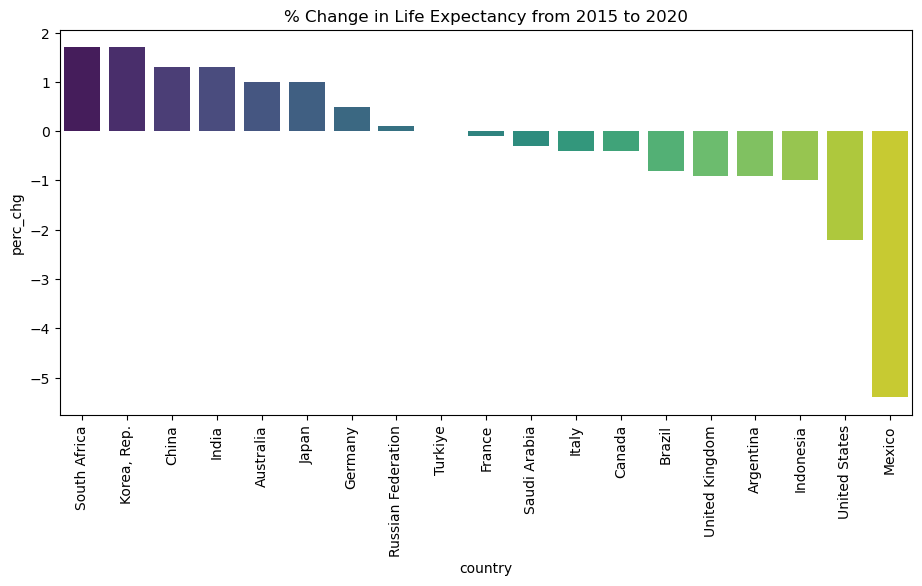

In [162]:
plt.figure(figsize=(11,5))
sns.barplot(x=life_expectancy.index, y=life_expectancy['perc_chg'], palette='viridis')
plt.title("% Change in Life Expectancy from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

## Foreign Direct Investment

In [168]:
fdi = pd.pivot_table(columns='year_o', index='country', values='Foreign direct investment (FDI)', data=new_df, aggfunc='mean').round(1)
fdi['perc_chg'] = round((fdi[2020] - fdi[2015])*100/fdi[2015],1)
fdi = fdi.sort_values(ascending=False, by='perc_chg')

In [170]:
fdi

year_o,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
Japan,0.1,0.8,0.4,0.5,0.8,1.2,1100.0
United Kingdom,1.5,12.1,4.7,-0.9,0.7,5.8,286.7
Germany,1.8,1.6,2.9,4.0,1.9,4.5,150.0
South Africa,0.4,0.7,0.5,1.4,1.3,0.9,125.0
"Korea, Rep.",0.3,0.8,1.1,0.7,0.6,0.5,66.7
Russian Federation,0.5,2.5,1.8,0.5,1.9,0.6,20.0
India,2.1,1.9,1.5,1.6,1.8,2.4,14.3
Mexico,3.0,3.5,2.8,3.0,2.3,2.8,-6.7
China,2.1,1.5,1.3,1.7,1.3,1.7,-19.0


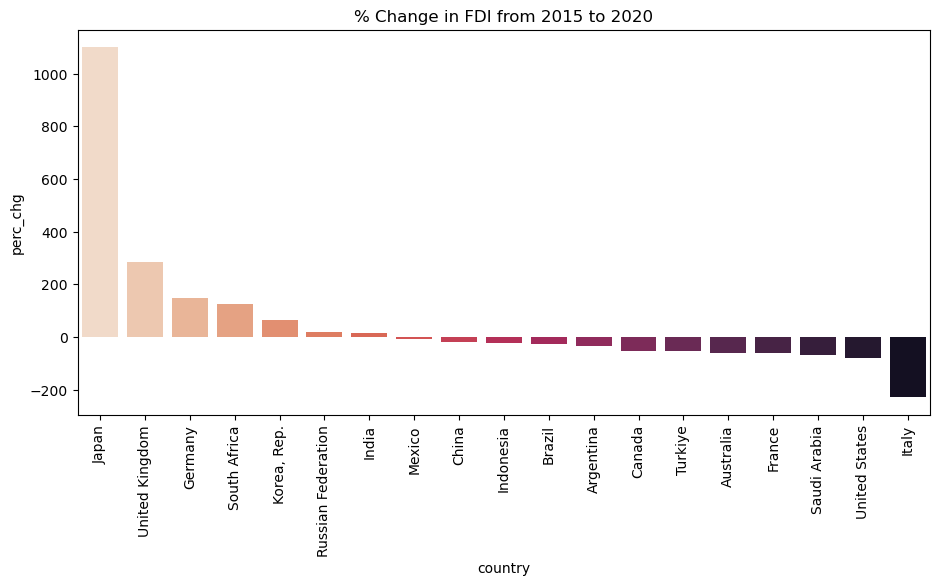

In [172]:
plt.figure(figsize=(11,5))
sns.barplot(x=fdi.index, y=fdi['perc_chg'], palette='rocket_r')
plt.title("% Change in FDI from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

## Exim(Export and Import)

In [182]:
new_df['net_exim_bal'] = new_df['Exports of goods and services'] - new_df['Imports of goods and services']

In [184]:
new_df.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o,net_exim_bal
0,Argentina,2020-01-01,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.878,NaN,100.0,...,1.266169,16.605414,13.598284,14.415156,43.000577,108.57,385.740508,375.344057,2020,3.007130
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,NaN,9.843,35.5,76.847,NaN,100.0,...,1.485007,17.924878,14.705737,14.210030,42.605730,112.42,447.754684,430.166792,2019,3.219142
2,Argentina,2018-01-01,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.770,NaN,100.0,...,2.232532,14.436686,16.325850,16.613885,42.361477,97.51,524.819892,506.094045,2018,-1.889164
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,NaN,8.347,25.7,76.543,NaN,100.0,...,1.789365,11.320283,13.969318,18.212567,42.982576,105.91,643.628393,627.200464,2017,-2.649034
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.105,NaN,99.9,...,0.584749,12.527095,13.566793,17.663228,43.432424,100.95,557.532321,545.251641,2016,-1.039698


In [194]:
exim = pd.pivot_table(index='country', columns='year_o', values='net_exim_bal', aggfunc='mean', data=new_df).round(2)
exim

year_o,2015,2016,2017,2018,2019,2020
country,,,,,,
Argentina,-1.07,-1.04,-2.65,-1.89,3.22,3.01
Australia,-1.53,-2.42,0.31,0.05,2.13,3.39
Brazil,-1.15,0.40,0.72,0.39,-0.64,0.61
Canada,-2.46,-2.36,-2.19,-1.95,-1.47,-2.21
China,3.18,2.23,1.72,0.65,0.91,2.37
France,-0.12,-0.35,-0.77,-0.97,-0.65,-1.72
Germany,7.42,7.26,7.09,5.99,5.64,5.35
India,-2.30,-1.77,-3.16,-3.76,-2.58,-0.39
Indonesia,0.38,0.76,1.00,-1.07,-0.44,1.69


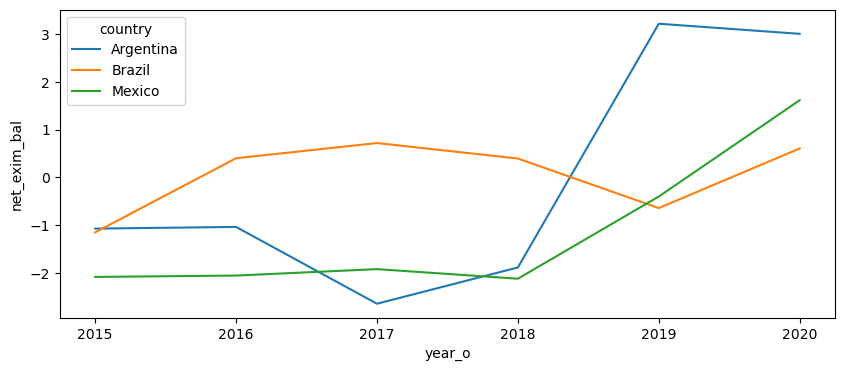

In [198]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year_o', y='net_exim_bal', data=new_df[new_df['country'].isin(['Argentina', 'Brazil','Mexico'])], hue='country', ci=False)
plt.show()

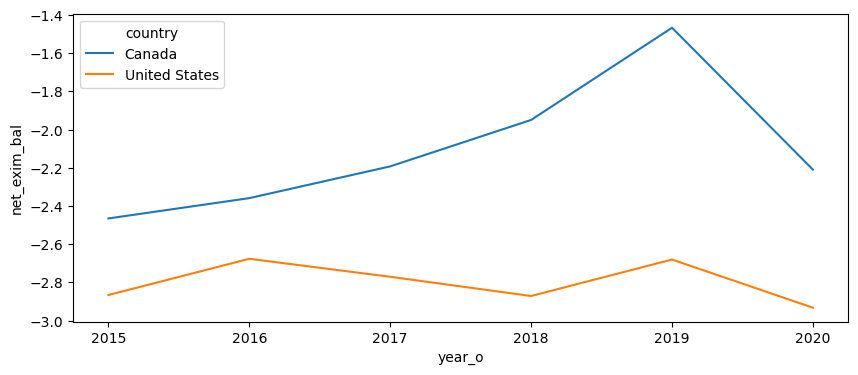

In [200]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year_o', y='net_exim_bal', data=new_df[new_df['country'].isin(['United States', 'Canada'])], hue='country', ci=False)
plt.show()

In [205]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]


In [207]:
new_df.to_excel("g20_worldbankdata.xlsx")